# Laboratorio 1 | Computer Vision

#### Integrantes
- Adrian Fulladolsa
- Renatto Guzmán

In [46]:
# Importar librerías

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML



## Ejercicio 1

![image.png](instr/image1.png)

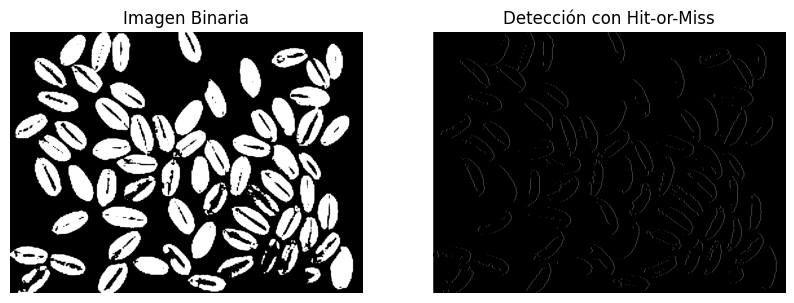

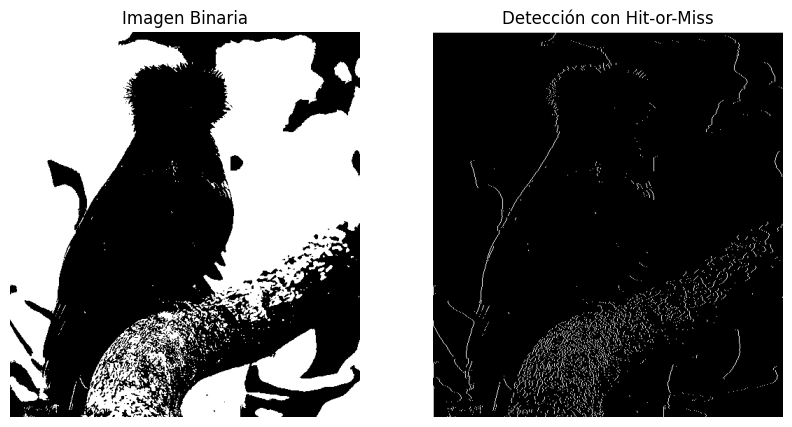

In [34]:

def hitOrMiss(path):
    # Cargar la imagen en escala de grises
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Binarizar la imagen (si no está binarizada)
    _, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Definir los elementos estructurantes para Hit-or-Miss
    # Por ejemplo, detectar esquinas superiores izquierdas
    kernel = np.array([[1, -1], 
                                  [0, 0]], dtype=np.int8)

    # Aplicar la transformación Hit-or-Miss
    hit_or_miss_result = cv2.morphologyEx(image_binary, cv2.MORPH_HITMISS, kernel)

    # Mostrar los resultados
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_binary, cmap='gray')
    axes[0].set_title("Imagen Binaria")
    axes[0].axis("off")

    axes[1].imshow(hit_or_miss_result, cmap='gray')
    axes[1].set_title("Detección con Hit-or-Miss")
    axes[1].axis("off")

    plt.show()

# Llamar a la función con la ruta de la imagen
hitOrMiss("instr/wheat.png")
hitOrMiss("instr/quetzalgris.png")

## Ejercicio 2

![image.png](instr/image2.png)

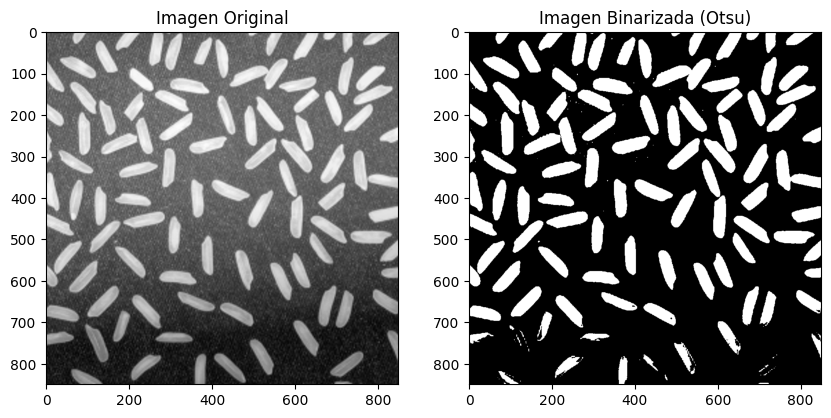

In [50]:
image_path = 'instr/rice.jpg'

# Cargar la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar el método de Otsu para binarizar la imagen
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original y la binarizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen Binarizada (Otsu)')
plt.imshow(binary_image, cmap='gray')
plt.show()


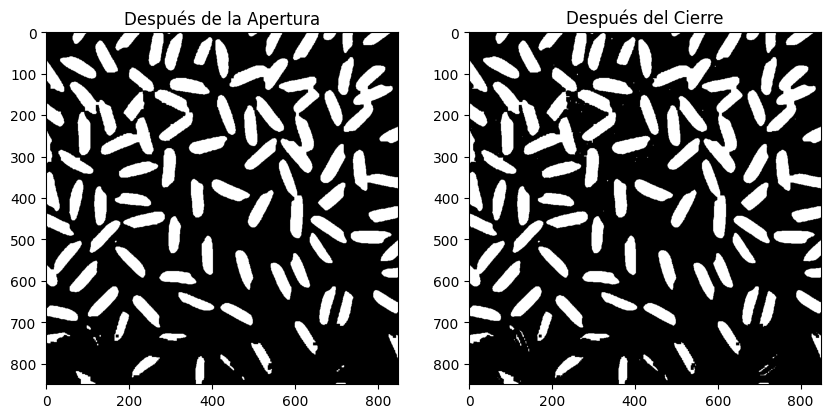

In [51]:
# Definir un kernel para las operaciones morfológicas
kernel = np.ones((3, 3), np.uint8)


closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=1)

# Mostrar la imagen después de las operaciones morfológicas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Después de la Apertura')
plt.imshow(opening, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Después del Cierre')
plt.imshow(closing, cmap='gray')
plt.show()


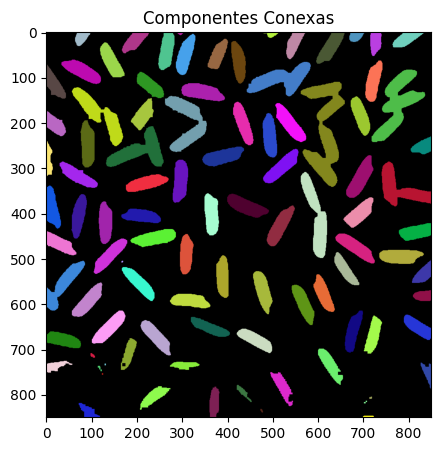

In [56]:
# Aplicar el algoritmo de componentes conexas
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)

# Crear una imagen de salida para visualizar los componentes
output_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)

# Asignar colores aleatorios a cada componente
for i in range(1, num_labels):
    mask = labels == i
    output_image[mask] = np.random.randint(0, 255, size=3)


# Mostrar la imagen con los componentes conexas
plt.figure(figsize=(10, 5))
plt.title('Componentes Conexas')
plt.imshow(output_image)
plt.show()

# Contar el número de granos de arroz
num_rice_grains = num_labels - 1  # Restamos 1 para excluir el fondo
# Print with a larger font size
HTML(f"<div style='font-size: 20px;'><strong>Número de granos de arroz: {num_rice_grains}</strong></div>")


## Ejercicio 3

![image.png](instr/image3.png)

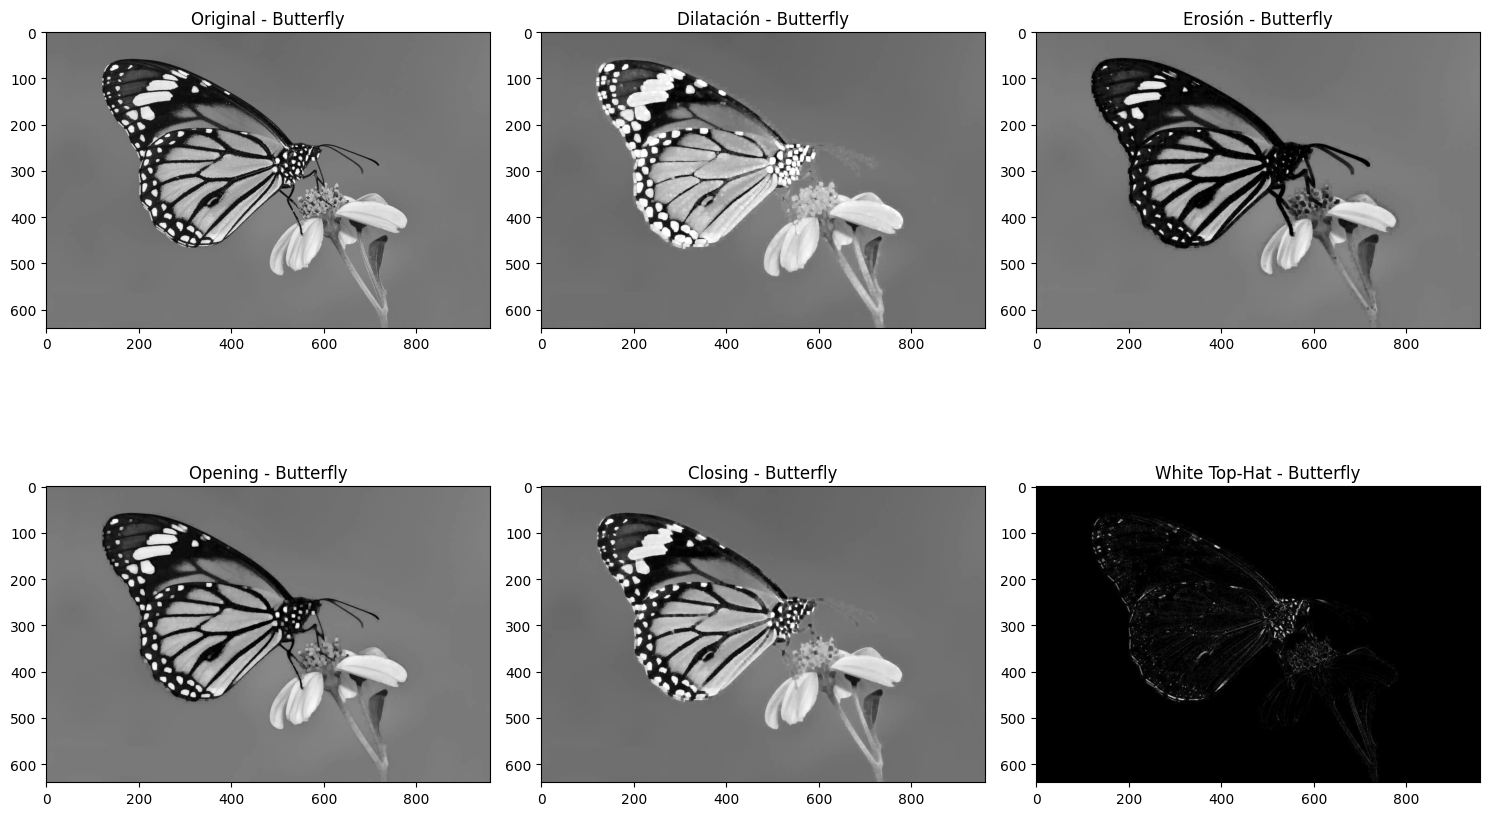

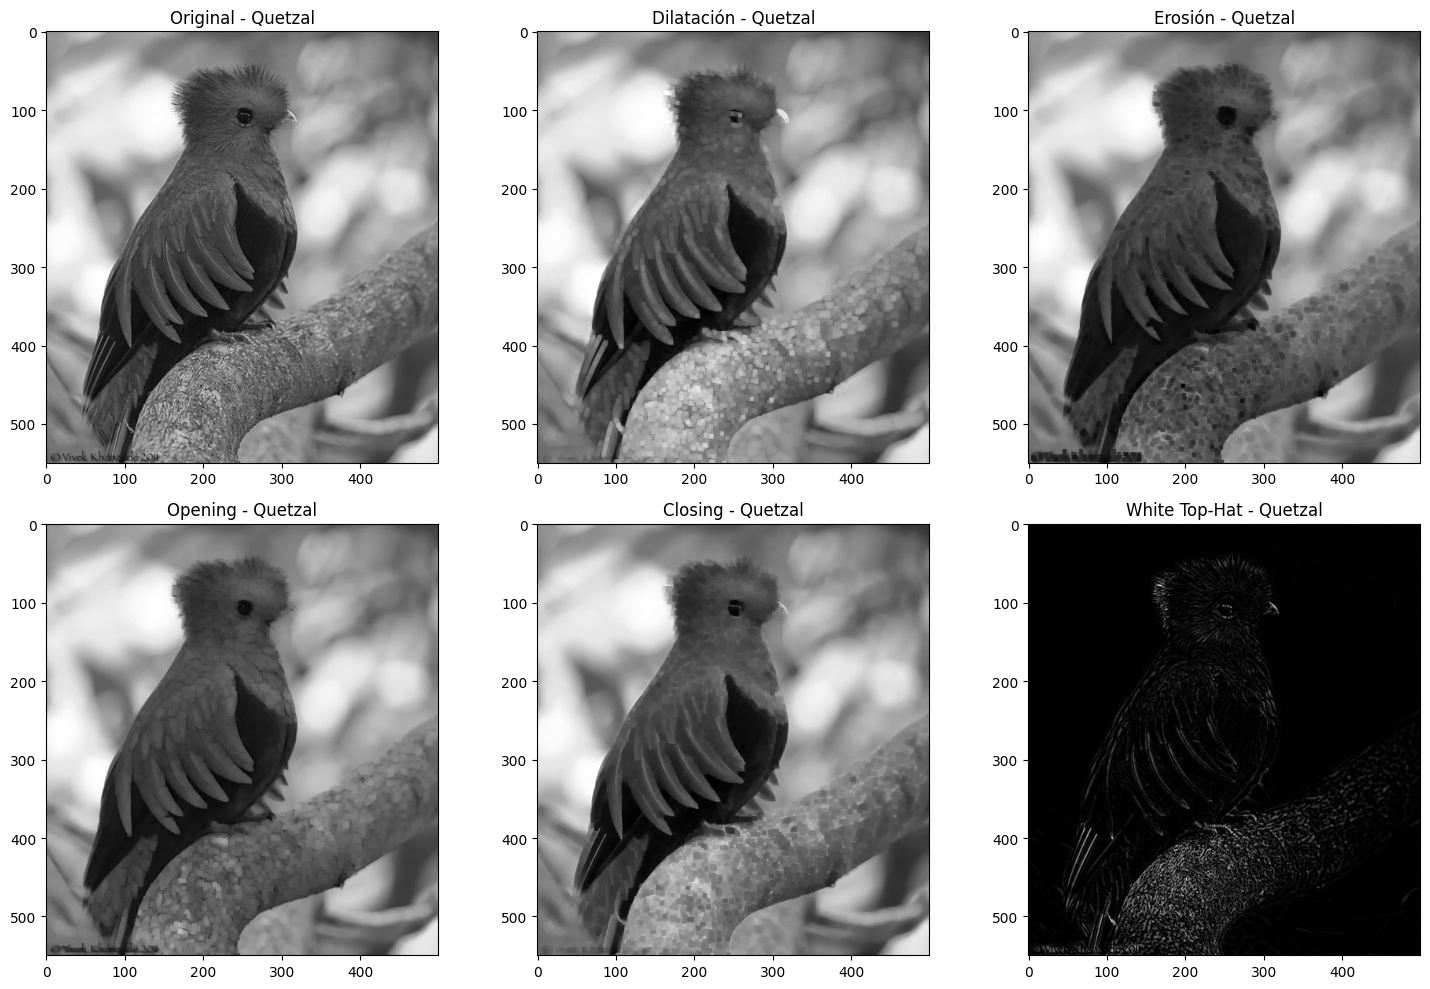

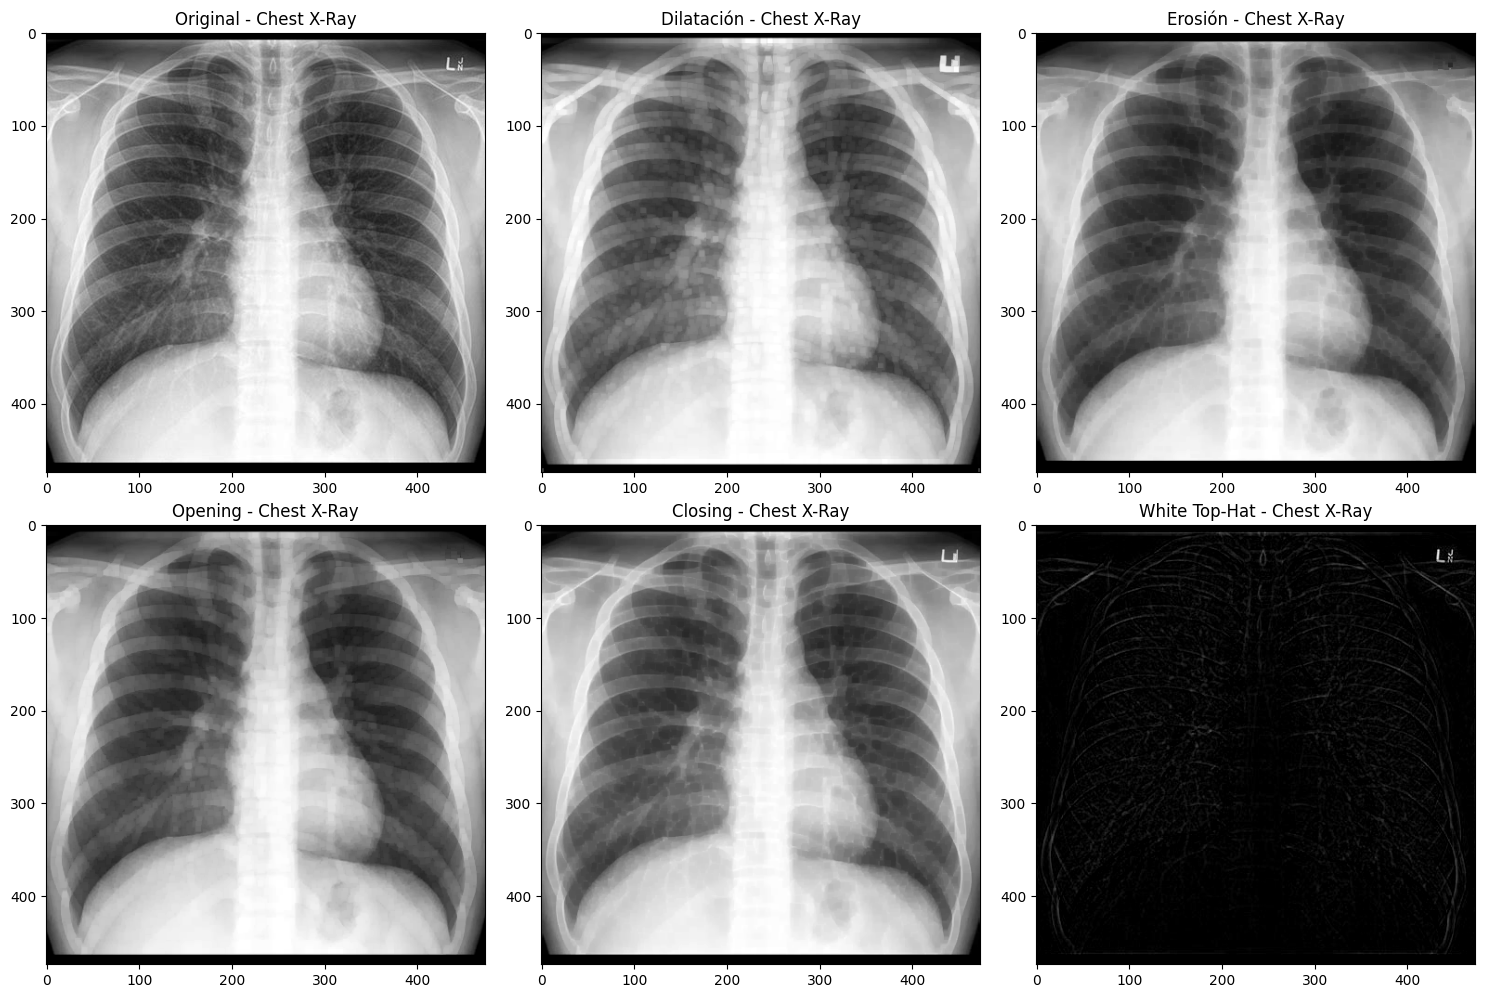

In [43]:
# Cargar las imágenes
butterfly = cv2.imread('instr/butterfly.jpeg', cv2.IMREAD_GRAYSCALE)
quetzal = cv2.imread('instr/quetzalgris.png', cv2.IMREAD_GRAYSCALE)
chest_xray = cv2.imread('instr/chestXray.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir un kernel para las operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)

# Aplicar operaciones morfológicas a cada imagen
def apply_morphological_operations(image, title):
    # Dilatación
    dilated = cv2.dilate(image, kernel, iterations=1)
    
    # Erosión
    eroded = cv2.erode(image, kernel, iterations=1)
    
    # Opening (Apertura)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # Closing (Cierre)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    # White Top-Hat
    white_tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    
    # Mostrar las imágenes
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.title(f'Original - {title}')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(2, 3, 2)
    plt.title(f'Dilatación - {title}')
    plt.imshow(dilated, cmap='gray')
    
    plt.subplot(2, 3, 3)
    plt.title(f'Erosión - {title}')
    plt.imshow(eroded, cmap='gray')
    
    plt.subplot(2, 3, 4)
    plt.title(f'Opening - {title}')
    plt.imshow(opening, cmap='gray')
    
    plt.subplot(2, 3, 5)
    plt.title(f'Closing - {title}')
    plt.imshow(closing, cmap='gray')
    
    plt.subplot(2, 3, 6)
    plt.title(f'White Top-Hat - {title}')
    plt.imshow(white_tophat, cmap='gray')
    
    plt.tight_layout()
    plt.show()

# Aplicar operaciones a cada imagen
apply_morphological_operations(butterfly, 'Butterfly')
apply_morphological_operations(quetzal, 'Quetzal')
apply_morphological_operations(chest_xray, 'Chest X-Ray')


## Ejercicio 4

![image.png](instr/image4.png)

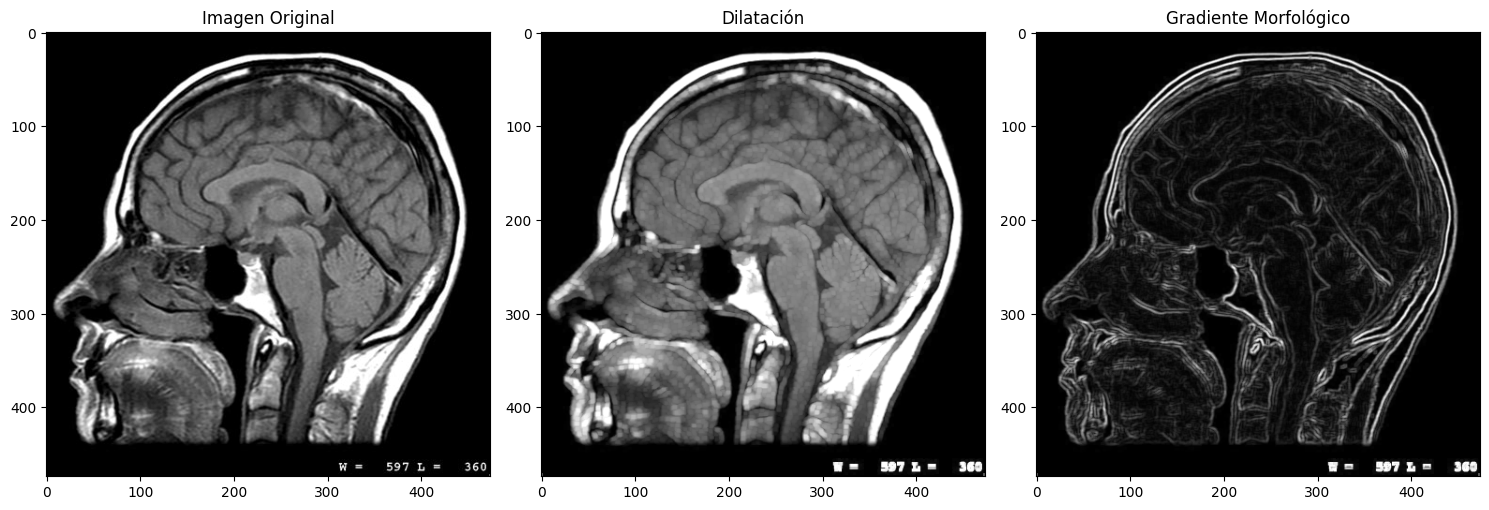

In [44]:
# Cargar la imagen en escala de grises
image = cv2.imread('instr/brain-scan.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir el elemento estructurante (kernel)
kernel = np.ones((3, 3), np.uint8)

# Aplicar dilatación
dilated = cv2.dilate(image, kernel, iterations=1)

# Aplicar erosión
eroded = cv2.erode(image, kernel, iterations=1)

# Calcular el gradiente morfológico
gradient = dilated - eroded

# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Dilatación')
plt.imshow(dilated, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gradiente Morfológico')
plt.imshow(gradient, cmap='gray')

plt.tight_layout()
plt.show()

## Ejercicio 5

![image.png](instr/image5.png)

## Ejercicio 6

![image.png](instr/image6.png)

## Ejercicio 7

![image.png](instr/image7.png)

## Ejercicio 8

![image.png](instr/image8.png)